In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from math import log
from arch.univariate import ZeroMean, GARCH, Normal, arch_model,ConstantMean, ARX
import datetime as dt


In [ ]:
st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)

In [3]:
tickers=['PG','JNJ','PEP','KO','MCD','COST','WMT','SBUX','GOOGL','V','ABT','META','CVS']
bench='^GSPC'
data=pd.DataFrame(columns=tickers)
for ticker in tickers:
    stock=yf.Ticker(ticker)
    data[ticker]=list(stock.history(start="2022-01-01", end="2022-12-31").Close)

bench_data=pd.DataFrame(columns=['^GSPC'])
bench_data['^GSPC']=list(yf.Ticker('^GSPC').history(start="2022-01-01", end="2022-12-31").Close)


In [4]:
data

,PG,JNJ,PEP,KO,MCD,COST,WMT,SBUX,GOOGL,V,ABT,META,CVS
0,155.018539,162.225662,163.771118,55.834465,256.880768,558.712646,140.792831,111.629265,144.991501,218.036118,134.063431,338.540009,98.674652
1,155.560959,161.790634,164.007782,56.766609,256.813873,556.267700,138.213486,109.294861,144.399506,219.050369,130.910492,336.529999,98.797791
2,156.265182,162.868744,164.566376,57.237385,255.551331,542.159607,140.082291,105.659370,137.774994,216.628052,130.322296,324.170013,100.237740
3,154.951920,162.310776,164.604248,56.936089,257.942474,542.041260,139.692978,106.329071,137.747498,216.381897,130.302979,332.459991,97.187317
4,154.866287,164.504791,164.812561,56.804272,255.427017,528.613525,141.026443,102.913605,137.016998,213.634644,130.707993,331.790009,98.703064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,148.841446,172.252960,177.173828,61.868107,261.646423,459.172852,142.135986,96.250587,89.230003,204.208374,106.058311,118.040001,90.633148
247,150.138535,172.204422,177.961227,62.246178,260.932587,455.054047,142.175537,97.161484,87.389999,204.664719,106.440666,116.879997,90.110046
248,148.197784,171.457123,176.678055,61.625748,259.240875,449.585449,139.684174,96.573807,86.019997,203.374985,105.715179,115.620003,89.858170
249,148.812195,172.330627,176.901642,61.994133,260.042694,453.098846,140.534409,97.719765,88.449997,206.420792,108.146538,120.260002,90.526581


In [5]:
for i in range(len(bench_data.index)-1):
    bench_data.iloc[len(bench_data.index)-i-1,:]=bench_data.iloc[len(bench_data.index)-i-1,:]/bench_data.iloc[len(bench_data.index)-i-2,:]

In [6]:
for i in range(1,len(bench_data.index)):
    bench_data.iloc[i]=log(bench_data.iloc[i])

In [7]:
for i in range(len(data.index)-1):
    data.iloc[len(data.index)-i-1,:]=data.iloc[len(data.index)-i-1,:]/data.iloc[len(data.index)-i-2,:]

In [8]:
for i in range(1,len(data.index)):
    for j in range(len(data.columns)):
        data.iloc[i,j]=log(data.iloc[i,j])

In [9]:
average=[]
for i in range(len(data.columns)):
    average.append(sum(data.iloc[1:,i]))

In [10]:
average

[-0.04763265849968008,
 0.05528818857560552,
 0.0698440214773687,
 0.0993175833264049,
 0.0031679021533134993,
 -0.2095906573876937,
 -0.004372937894992671,
 -0.13880886987407168,
 -0.4967280466245109,
 -0.05618690232998776,
 -0.21955106842540478,
 -1.0343212396406114,
 -0.0889705542228972]

In [11]:
bench_cov=[]
for i in range(len(data.columns)):
    

    bench_cov.append(sum(data.iloc[1:,i]*bench_data.iloc[1:,0])/(len(data.index)-1)-(sum(data.iloc[1:,i])/(len(data.index)-1))*(sum(bench_data.iloc[1:,0])/(len(data.index)-1)))

In [12]:
covariance=pd.DataFrame(columns=tickers,index=tickers)

In [13]:
for i in range(len(tickers)):
    for j in range(len(tickers)):
        covariance.iloc[i,j]=(sum(data.iloc[1:,i]*data.iloc[1:,j])/(len(data.index)-1))-(sum(data.iloc[1:,i])/(len(data.index)-1))*(sum(data.iloc[1:,j])/(len(data.index)-1))

In [14]:
covariance

,PG,JNJ,PEP,KO,MCD,COST,WMT,SBUX,GOOGL,V,ABT,META,CVS
PG,0.000193,0.000089,0.000126,0.00013,0.000098,0.000149,0.000098,0.000121,0.000117,0.000115,0.000125,0.00013,0.000115
JNJ,0.000089,0.00012,0.00008,0.000078,0.000065,0.00009,0.000061,0.00006,0.000073,0.000067,0.000094,0.000071,0.00009
PEP,0.000126,0.00008,0.000151,0.000128,0.000104,0.000143,0.000098,0.000119,0.000125,0.000114,0.000118,0.000138,0.000106
KO,0.00013,0.000078,0.000128,0.000155,0.000098,0.000141,0.000092,0.00011,0.000113,0.000121,0.000113,0.000108,0.00011
MCD,0.000098,0.000065,0.000104,0.000098,0.000155,0.000123,0.000072,0.000154,0.000124,0.000128,0.000109,0.000113,0.000095
COST,0.000149,0.00009,0.000143,0.000141,0.000123,0.0004,0.000201,0.000223,0.000274,0.000187,0.000179,0.0003,0.000143
WMT,0.000098,0.000061,0.000098,0.000092,0.000072,0.000201,0.000291,0.000097,0.000125,0.000071,0.00008,0.000119,0.000088
SBUX,0.000121,0.00006,0.000119,0.00011,0.000154,0.000223,0.000097,0.000505,0.000327,0.000247,0.000216,0.000457,0.000126
GOOGL,0.000117,0.000073,0.000125,0.000113,0.000124,0.000274,0.000125,0.000327,0.000593,0.000282,0.000243,0.000679,0.000141
V,0.000115,0.000067,0.000114,0.000121,0.000128,0.000187,0.000071,0.000247,0.000282,0.000374,0.000204,0.000363,0.000116


In [15]:
coefficient=pd.DataFrame(columns=tickers,index=tickers)
for i in range(len(tickers)):
    for j in range(len(tickers)):
        coefficient.iloc[i,j]=covariance.iloc[i,j]/((covariance.iloc[i,i]*covariance.iloc[j,j])**(0.5))
        

In [16]:
coefficient

,PG,JNJ,PEP,KO,MCD,COST,WMT,SBUX,GOOGL,V,ABT,META,CVS
PG,1.0,0.586901,0.736908,0.750157,0.568233,0.536032,0.413968,0.388134,0.344593,0.428367,0.536127,0.220435,0.489392
JNJ,0.586901,1.0,0.595814,0.57188,0.478366,0.41104,0.327084,0.244258,0.273053,0.31523,0.510759,0.154228,0.490031
PEP,0.736908,0.595814,1.0,0.839246,0.678448,0.583146,0.468011,0.430791,0.416154,0.479308,0.569004,0.265125,0.512633
KO,0.750157,0.57188,0.839246,1.0,0.631168,0.564645,0.431072,0.391985,0.374184,0.502442,0.540696,0.204405,0.526384
MCD,0.568233,0.478366,0.678448,0.631168,1.0,0.494093,0.337509,0.549688,0.408038,0.533531,0.522122,0.213926,0.454531
COST,0.536032,0.41104,0.583146,0.564645,0.494093,1.0,0.589554,0.496072,0.5635,0.483918,0.531355,0.35464,0.422857
WMT,0.413968,0.327084,0.468011,0.431072,0.337509,0.589554,1.0,0.253869,0.300018,0.213811,0.279051,0.165356,0.307135
SBUX,0.388134,0.244258,0.430791,0.391985,0.549688,0.496072,0.253869,1.0,0.597036,0.568092,0.570434,0.480602,0.33251
GOOGL,0.344593,0.273053,0.416154,0.374184,0.408038,0.5635,0.300018,0.597036,1.0,0.598806,0.594062,0.65795,0.342657
V,0.428367,0.31523,0.479308,0.502442,0.533531,0.483918,0.213811,0.568092,0.598806,1.0,0.627402,0.443182,0.355144


In [18]:
bench_cov

[0.00015984994420281638,
 0.00011004232232917281,
 7.078814578869579e-05,
 0.00011422574485535601,
 0.00011366994139758963,
 0.00011296581619208389,
 0.00021405155769207477,
 0.00010232684198351021,
 0.00015099368365058158,
 0.000249034318236169,
 0.0003109186942839908,
 0.00022530291855966033,
 0.00019331570104385066,
 0.00040733351071252816,
 0.00013262772010191155]

In [19]:
bench_coe=[]
for i in range(len(bench_cov)):
    bench_coe.append(bench_cov[i]/(covariance.iloc[i,i]*(sum(bench_data.iloc[1:,0]**2)/(len(data.index)-1)-(sum(bench_data.iloc[1:,0])/(len(data.index)-1))**2))**0.5)

In [20]:
bench_coe

[0.728842047143037,
 0.5202867218866843,
 0.42490944610429787,
 0.6098033244384352,
 0.5994063556007315,
 0.5954263151970323,
 0.7028240104301373,
 0.3937296975646464,
 0.7026349854097529,
 0.7275693886174847,
 0.8380233352175261,
 0.7650867131508485,
 0.7546267760965306,
 0.6315053126362761,
 0.5165043488045887]

In [23]:
his_data=pd.DataFrame(columns=tickers)
for ticker in tickers:
    stock=yf.Ticker(ticker)
    his_data[ticker]=list(stock.history(start="2018-01-01", end="2022-12-31").Close)

his_bench_data=pd.DataFrame(columns=['^GSPC'])
his_bench_data['^GSPC']=yf.Ticker('^GSPC').history(start="2018-01-01", end="2022-12-31").Close

In [25]:
his_bench_data

,^GSPC
Date,
2018-01-02 00:00:00-05:00,2695.810059
2018-01-03 00:00:00-05:00,2713.060059
2018-01-04 00:00:00-05:00,2723.989990
2018-01-05 00:00:00-05:00,2743.149902
2018-01-08 00:00:00-05:00,2747.709961
...,...
2022-12-23 00:00:00-05:00,3844.820068
2022-12-27 00:00:00-05:00,3829.250000
2022-12-28 00:00:00-05:00,3783.219971


In [26]:
for i in range(len(his_bench_data.index)-1):
    his_bench_data.iloc[len(his_bench_data.index)-i-1,:]=his_bench_data.iloc[len(his_bench_data.index)-i-1,:]/his_bench_data.iloc[len(his_bench_data.index)-i-2,:]

In [27]:
for i in range(len(his_data.index)-1):
    his_data.iloc[len(his_data.index)-i-1,:]=his_data.iloc[len(his_data.index)-i-1,:]/his_data.iloc[len(his_data.index)-i-2,:]

In [28]:
his_data

,IEMG,PG,JNJ,PEP,KO,MCD,COST,WMT,VWO,SBUX,GOOGL,V,ABT,META,CVS
0,50.185276,77.153870,118.394836,99.948715,37.955715,151.390366,174.478851,88.952393,39.701195,50.981380,53.660500,109.938263,53.086952,181.419998,61.883705
1,1.008793,0.998786,1.009552,0.997374,0.997804,0.995786,1.012001,1.008723,1.009636,1.018740,1.017061,1.009956,1.002211,1.017914,0.995648
2,1.004102,1.007069,0.999929,1.004926,1.014085,1.007015,0.992234,1.000905,1.006151,1.003747,1.003884,1.003718,0.998303,0.998159,1.026366
3,1.008511,1.000658,1.008253,1.002873,0.999783,1.002015,0.992861,1.005927,1.008853,1.011539,1.013260,1.023949,1.002890,1.013671,1.044190
4,1.000675,1.005261,1.001270,0.994270,0.998480,0.999311,1.003888,1.014781,1.000209,0.994967,1.003531,1.004038,0.997118,1.007653,0.991332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.998714,1.002825,1.002542,1.006461,1.007578,1.006773,1.008589,1.002021,0.997940,1.005217,1.016750,1.003755,1.001388,1.007855,1.001713
1255,1.014163,1.008715,0.999718,1.004444,1.006111,0.997272,0.991030,1.000278,1.015742,1.009464,0.979379,1.002235,1.003605,0.990173,0.994228
1256,0.985188,0.987074,0.995660,0.992790,0.990033,0.993517,0.987983,0.982477,0.985518,0.993952,0.984323,0.993698,0.993184,0.989220,0.997205
1257,1.017397,1.004146,1.005095,1.001265,1.005978,1.003093,1.007815,1.006087,1.017272,1.011866,1.028249,1.014976,1.022999,1.040131,1.007439


In [29]:
predict_var=[]
for i in range(len(his_data.columns)):
    am=ConstantMean(list(his_data.iloc[1:,i]*100))
    am.volatility=GARCH(1,0,1)
    am.distribution=Normal()
    res=am.fit()
    predict_var.append(res.forecast().variance.iloc[0,0])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 265629490902.75858
Iteration:      2,   Func. Count:     14,   Neg. LLF: 726431160.4389461
Iteration:      3,   Func. Count:     21,   Neg. LLF: 466071949.33220696
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2082.287952011333
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2594.4707695350135
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2062.4336140227424
Iteration:      7,   Func. Count:     45,   Neg. LLF: 2061.1297566638455
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2055.0955694460663
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2055.07658090932
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2055.0760949276646
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2055.0759003417434
Iteration:     12,   Func. Count:     71,   Neg. LLF: 2055.075890200525
Iteration:     13,   Func. Count:     76,   Neg. LLF: 2055.075889326038
Optimization terminated successfully    (Exit mode 0)
   

In [30]:
adj_predict_var=[var/100 for var in predict_var]

In [43]:
adj_predict_var

[0.016736127947732188,
 0.009566604849727958,
 0.009191097754874313,
 0.007922431800699025,
 0.010533193124614017,
 0.009802941480654854,
 0.017803658652157967,
 0.014392231008007563,
 0.015900404973988678,
 0.018577207406085008,
 0.03814832591765347,
 0.01470684101689502,
 0.019107022247766465,
 0.06622018509117758,
 0.020761382574399537]

In [31]:
his_bench_data

,^GSPC
Date,
2018-01-02 00:00:00-05:00,2695.810059
2018-01-03 00:00:00-05:00,1.006399
2018-01-04 00:00:00-05:00,1.004029
2018-01-05 00:00:00-05:00,1.007034
2018-01-08 00:00:00-05:00,1.001662
...,...
2022-12-23 00:00:00-05:00,1.005868
2022-12-27 00:00:00-05:00,0.995950
2022-12-28 00:00:00-05:00,0.987979


In [46]:
am=ConstantMean(his_bench_data.iloc[1:,0]*100)
am.volatility=GARCH(1,0,1)
am.distribution=Normal()
res=am.fit()
bench_var=res.forecast().variance.iloc[0,0]
res.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9302.195690984621
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4180.108067517682
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2306.803817786125
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1839.2842365829335
Iteration:      5,   Func. Count:     38,   Neg. LLF: 4949.091419767892
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1838.7667254889614
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1838.7671696014932
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1838.7666987976122
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1838.7666987977505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1838.7666987976122
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1838.77
Distribution:                  Normal   AIC:                           3685.53
Method:            Maximum Likelihood   BIC:                           3706.08
                                        No. Observations:                 1258
Date:                Wed, Nov 29 2023   Df Residuals:                     1257
Time:                        10:23:27   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           100.

In [44]:
bench_var

1.3841437499946219

In [53]:
ar = ARX(100 *his_bench_data.iloc[1:,0],lags=[1, 3, 12])
ar.volatility=GARCH(1,0,1)
ar.distribution=Normal()
adj_res=ar.fit()
adj_res.summary

Iteration:      1,   Func. Count:      9,   Neg. LLF: 376586410161.4393
Iteration:      2,   Func. Count:     26,   Neg. LLF: 12544.303986852
Iteration:      3,   Func. Count:     39,   Neg. LLF: 35755511126.99504
Iteration:      4,   Func. Count:     50,   Neg. LLF: 5304796993.21843
Iteration:      5,   Func. Count:     61,   Neg. LLF: 2231.996013772541
Iteration:      6,   Func. Count:     71,   Neg. LLF: 808705547.0721402
Iteration:      7,   Func. Count:     81,   Neg. LLF: 1827.6552312026824
Iteration:      8,   Func. Count:     90,   Neg. LLF: 1826.0800329960593
Iteration:      9,   Func. Count:     99,   Neg. LLF: 1839.2675061827445
Iteration:     10,   Func. Count:    108,   Neg. LLF: 1825.2390090451356
Iteration:     11,   Func. Count:    116,   Neg. LLF: 1825.222073168684
Iteration:     12,   Func. Count:    124,   Neg. LLF: 1825.1670619419651
Iteration:     13,   Func. Count:    132,   Neg. LLF: 1825.131662475187
Iteration:     14,   Func. Count:    140,   Neg. LLF: 1825.119

<bound method ARCHModelResult.summary of                            AR - GARCH Model Results                           
Dep. Variable:                  ^GSPC   R-squared:                       0.015
Mean Model:                        AR   Adj. R-squared:                  0.013
Vol Model:                      GARCH   Log-Likelihood:               -1825.12
Distribution:                  Normal   AIC:                           3664.24
Method:            Maximum Likelihood   BIC:                           3700.13
                                        No. Observations:                 1246
Date:                Wed, Nov 29 2023   Df Residuals:                     1242
Time:                        11:59:52   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const        1

In [51]:
adj_res.forecast().variance

,h.1
Date,
2022-12-30 00:00:00-05:00,1.451389


D:\anaconda\Lib\site-packages\arch\univariate\base.py:1621: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plot_fn(x_values, y_values, linestyle="-", marker="")
D:\anaconda\Lib\site-packages\arch\univariate\base.py:1636: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  line = plot_fn(temp_x, temp_y, linewidth=3, linestyle="-", marker="")


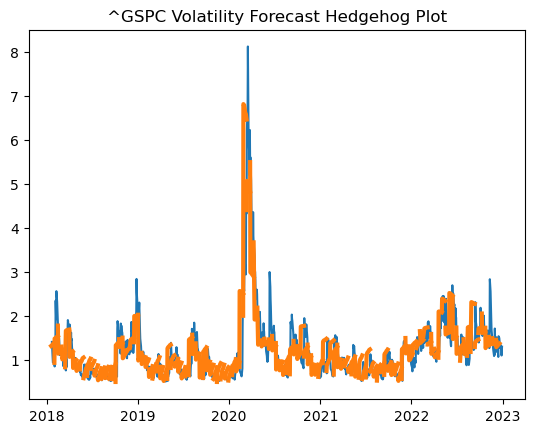

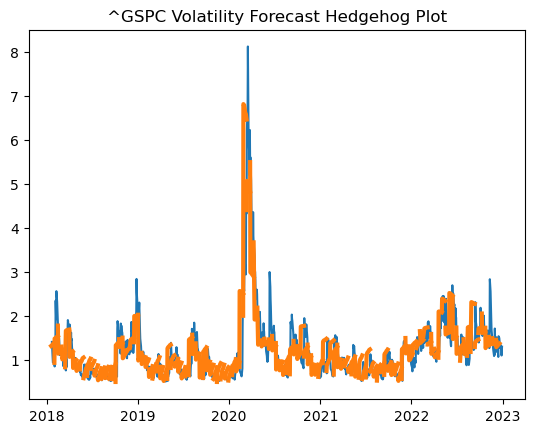

In [40]:
adj_res.hedgehog_plot()

In [33]:
bench_var=bench_var/100
bench_var

0.013841437499946218

In [ ]:
df = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], axis=1)
df.columns = ["Estimated", "Fixed"]
subplot = df.plot()
subplot.set_xlim(xlim)

D:\anaconda\Lib\site-packages\arch\univariate\base.py:1621: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plot_fn(x_values, y_values, linestyle="-", marker="")
D:\anaconda\Lib\site-packages\arch\univariate\base.py:1636: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  line = plot_fn(temp_x, temp_y, linewidth=3, linestyle="-", marker="")
D:\anaconda\Lib\site-packages\arch\univariate\base.py:1621: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plot_fn(x_values, y_values, linestyle="-", marker="")
D:\anaconda\Lib\site-packages\arch\univariate\base.py:1636: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" 

AttributeError: 'Figure' object has no attribute 'set_xlim'

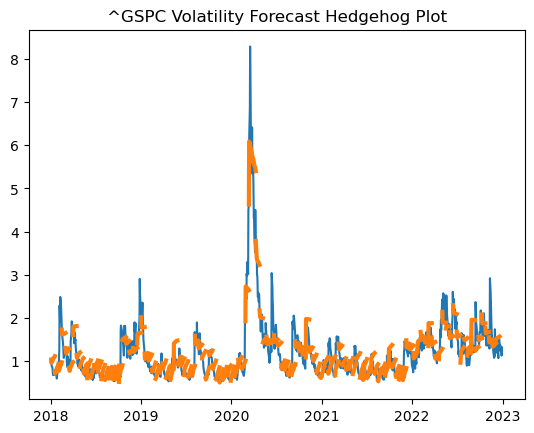

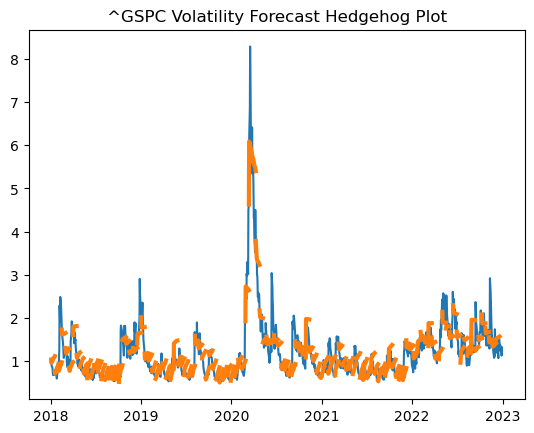

In [38]:
res.hedgehog_plot()
xlim = res.hedgehog_plot().set_xlim(his_bench_data.index.min(), his_bench_data.index.max())

In [30]:
adj_predict_var

[0.016736122117784445,
 0.009566625237508487,
 0.009191103382274725,
 0.007922424638908288,
 0.010533152874977606,
 0.009802924456324975,
 0.017803643266890313,
 0.014392210718927266,
 0.015900493143273214,
 0.018577225792376372,
 0.03814832591765347,
 0.014706804353362569,
 0.01910702967565887,
 0.06622018509117758,
 0.02076134524526447]

In [31]:
adj_predict_var
bench_var

0.013841437499946218

In [32]:
coefficient

,IEMG,PG,JNJ,PEP,KO,MCD,COST,WMT,VWO,SBUX,GOOGL,V,ABT,META,CVS
IEMG,1.0,0.311436,0.128952,0.317154,0.314128,0.338264,0.404824,0.18123,0.994148,0.655398,0.602322,0.597446,0.500341,0.515612,0.257522
PG,0.311436,1.0,0.586902,0.736908,0.750157,0.568233,0.536032,0.413967,0.293516,0.388134,0.344593,0.428367,0.536127,0.220435,0.489392
JNJ,0.128952,0.586902,1.0,0.595814,0.57188,0.478367,0.41104,0.327084,0.120909,0.244257,0.273054,0.31523,0.510759,0.154228,0.490031
PEP,0.317154,0.736908,0.595814,1.0,0.839246,0.678449,0.583147,0.468011,0.298839,0.430793,0.416154,0.479308,0.569005,0.265125,0.512632
KO,0.314128,0.750157,0.57188,0.839246,1.0,0.631168,0.564645,0.431072,0.295664,0.391986,0.374184,0.502442,0.540696,0.204405,0.526383
MCD,0.338264,0.568233,0.478367,0.678449,0.631168,1.0,0.494094,0.337509,0.322415,0.549689,0.408038,0.533532,0.522123,0.213927,0.454533
COST,0.404824,0.536032,0.41104,0.583147,0.564645,0.494094,1.0,0.589553,0.38439,0.496072,0.5635,0.483918,0.531355,0.35464,0.422857
WMT,0.18123,0.413967,0.327084,0.468011,0.431072,0.337509,0.589553,1.0,0.171681,0.253869,0.300018,0.213812,0.27905,0.165357,0.307135
VWO,0.994148,0.293516,0.120909,0.298839,0.295664,0.322415,0.38439,0.171681,1.0,0.641029,0.577084,0.577029,0.475871,0.498007,0.241561
SBUX,0.655398,0.388134,0.244257,0.430793,0.391986,0.549689,0.496072,0.253869,0.641029,1.0,0.597036,0.568092,0.570434,0.480602,0.332509


In [33]:
input_matrix=pd.DataFrame(columns=tickers+['risk_free'],index=tickers+['risk_free'])

In [34]:
for i in range(len(coefficient.index)):
    for j in range(len(coefficient.columns)):
        input_matrix.iloc[i,j]=coefficient.iloc[i,j]*adj_predict_var[i]*adj_predict_var[j]

In [35]:
input_matrix['risk_free']=0.0

In [36]:
input_matrix.loc['risk_free']=0.0

In [37]:
input_matrix

,IEMG,PG,JNJ,PEP,KO,MCD,COST,WMT,VWO,SBUX,GOOGL,V,ABT,META,CVS,risk_free
IEMG,0.00028,0.00005,0.00002,0.000042,0.000055,0.000055,0.000121,0.000044,0.000265,0.000204,0.000385,0.000147,0.00016,0.000571,0.000089,0.0
PG,0.00005,0.000092,0.000052,0.000056,0.000076,0.000053,0.000091,0.000057,0.000045,0.000069,0.000126,0.00006,0.000098,0.00014,0.000097,0.0
JNJ,0.00002,0.000052,0.000084,0.000043,0.000055,0.000043,0.000067,0.000043,0.000018,0.000042,0.000096,0.000043,0.00009,0.000094,0.000094,0.0
PEP,0.000042,0.000056,0.000043,0.000063,0.00007,0.000053,0.000082,0.000053,0.000038,0.000063,0.000126,0.000056,0.000086,0.000139,0.000084,0.0
KO,0.000055,0.000076,0.000055,0.00007,0.000111,0.000065,0.000106,0.000065,0.00005,0.000077,0.00015,0.000078,0.000109,0.000143,0.000115,0.0
MCD,0.000055,0.000053,0.000043,0.000053,0.000065,0.000096,0.000086,0.000048,0.00005,0.0001,0.000153,0.000077,0.000098,0.000139,0.000093,0.0
COST,0.000121,0.000091,0.000067,0.000082,0.000106,0.000086,0.000317,0.000151,0.000109,0.000164,0.000383,0.000127,0.000181,0.000418,0.000156,0.0
WMT,0.000044,0.000057,0.000043,0.000053,0.000065,0.000048,0.000151,0.000207,0.000039,0.000068,0.000165,0.000045,0.000077,0.000158,0.000092,0.0
VWO,0.000265,0.000045,0.000018,0.000038,0.00005,0.00005,0.000109,0.000039,0.000253,0.000189,0.00035,0.000135,0.000145,0.000524,0.00008,0.0
SBUX,0.000204,0.000069,0.000042,0.000063,0.000077,0.0001,0.000164,0.000068,0.000189,0.000345,0.000423,0.000155,0.000202,0.000591,0.000128,0.0


In [38]:
bench_coe

[0.7288420532440202,
 0.5202864566990075,
 0.4249103834778714,
 0.6098035917076651,
 0.5994062475484004,
 0.5954270370831528,
 0.7028239468185444,
 0.3937295188189359,
 0.7026351567900995,
 0.7275695387556288,
 0.8380233352175261,
 0.7650868758202876,
 0.7546270433662382,
 0.6315053126362761,
 0.5165044954896794]

In [39]:
imput_vec=[]
for i in range(len(bench_coe)):
    imput_vec.append((bench_coe[i]*bench_var*adj_predict_var[i])/(bench_var**2))

In [40]:
imput_vec.append(0.0)

In [41]:
origin_matrix=np.array(input_matrix,dtype=float)
beta=np.array(imput_vec,dtype=float)
aim_beta=sum(imput_vec)/len(imput_vec)

In [42]:
tem_matrix=np.vstack((origin_matrix,np.ones(origin_matrix.shape[1])))
tem_matrix=np.vstack((tem_matrix,beta))
tem_matrix=tem_matrix.T
tem_matrix=np.vstack((tem_matrix,np.append(np.ones(origin_matrix.shape[1]),[0.0,0.0])))
tem_matrix=np.vstack((tem_matrix,np.append(beta,[0.0,0.0])))
A=tem_matrix
b=np.append(np.zeros(origin_matrix.shape[1]),[1.0,aim_beta])
x=np.zeros(A.shape[0])

In [43]:
x=np.linalg.solve(A,b)

In [44]:
for i in range(len(A)):
    for element in A[i]:
        element=float(element)

In [45]:
for element in b:
    element=float(element)

In [46]:
1/sum(x[:-3])

1.2121850417849072

In [47]:
portfolio=[i*1/sum(x[:-3]) for i in x[:-3]]

In [48]:
portfolio

[0.39496210465730464,
 -0.13248090948638166,
 0.04204771952683534,
 0.018464914859867197,
 0.1661329565533774,
 0.06861525660543492,
 0.1293914925037331,
 0.014070736488441113,
 -0.230575004144549,
 0.06231924433011262,
 0.11777782028444257,
 0.1586782389940895,
 0.10095644918041784,
 0.02203312702617507,
 0.06760585262069935]

In [49]:
sum(portfolio)

1.0